The Mnist Database of handwritten digits, collected by Yann Lecun, courant institute of NYU, is a well-known dataset among the field of pattern recognition. It contains a training set of 60,000 examples, and a test set of 10,000 examples. The black & white images, centered in 28x28 pixels field, are collected from NIST's Special Database 1 and Special Database 3 which include binary images of handwritten digits. We take 7000 samples(has same distribution with whole dataset) as our data. With this dataset we can train our MLP to recognize handwritten digits which can be used in both dentify certain people by certain habits or occupations and number recognition. This MLP can be very useful in criminal identification or document scanning. Parties like police station and government departments will be interested in our model. As we try to build a prototype, we want precision and recall to be relatively high for our model to be used in different cases. So our goal is to build a MLP whose F1 score for testset can reach 90%. 

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.special import expit
import sys
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
import warnings
warnings.simplefilter('ignore', UserWarning)

Handw_char = fetch_mldata('mnist original',target_name = 'digit',data_name = 'Handwirting')
X = Handw_char.data
y = Handw_char.target
X1, X, y1, y = train_test_split(
    X, y, test_size=0.1, random_state=42)
# get some of the specifics of the dataset
n_samples, n_features = X.shape
h = w = 28
n_classes = np.unique(y).shape[0]
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: %d" % n_classes)
print("Original Image Sizes {} by {}".format(h, w))
print("Values of data: {}" .format(np.unique(X)))

n_samples: 7000
n_features: 784
n_classes: 10
Original Image Sizes 28 by 28
Values of data: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223

Our data contains 7000 samples and each sample contains 784 features. Both data and target are represented by int. But data's value is too large, we have to do scaling. And use randomized PCA to reduce the features from 784 features to 300 features. 

In [153]:
from sklearn.decomposition import RandomizedPCA

n_components =300
print ("Extracting the top %d eigenfaces from %d images" % (
    n_components, X.shape[0]))

rpca = RandomizedPCA(n_components=n_components)
%time rpca.fit(X)
X = rpca.fit_transform(X)

Extracting the top 300 eigenfaces from 7000 images
Wall time: 757 ms


In [154]:
# Let's do standard scaling
X = X/255
n_samples, n_features = X.shape
n_classes = np.unique(y).shape[0]
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: %d" % n_classes)
print("Values of data: {}" .format(np.unique(X)))

n_samples: 7000
n_features: 300
n_classes: 10
Values of data: [-5.53794033 -5.45418499 -5.43256595 ...,  8.07813108  8.5472354   9.0721112 ]


Our final data contains 7000 samples and each sample contains 300 features. Both data (sclaed) and target are represented by int. Now, let's train our MLP.

Number of instances: 7000
Number of instances in each class: 0: 671 1: 800 2: 697 3: 719 4: 653 5: 662 6: 712 7: 739 8: 686 9: 661


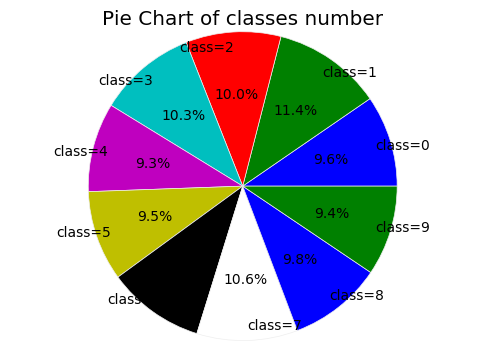

In [155]:
%matplotlib inline
plt.style.use('ggplot')
print('Number of instances:',n_samples)
print('Number of instances in each class:','0:',sum(y == 0),'1:',sum(y == 1),
      '2:',sum(y == 2),'3:',sum(y == 3),'4:',sum(y == 4),'5:',sum(y == 5),'6:',sum(y == 6),
      '7:',sum(y == 7),'8:',sum(y == 8),'9:',sum(y == 9))
size=[sum(y==0),sum(y==1),sum(y==2),sum(y==3),sum(y==4),sum(y==5),sum(y==6),sum(y==7),sum(y==8),sum(y==9)]
plt.pie(
    size,
    # with the labels being platform
    labels=[u'class=0',u'class=1',u'class=2',u'class=3',u'class=4',u'class=5',u'class=6',u'class=7',u'class=8',u'class=9'],
    # with no shadows
    shadow=False,
    # stating our colors

    # with the start angle at 90%
    labeldistance = 0.9,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of classes number')

In this lab, we want to use the F1 score to evaluate your algorithm’s generalization performance. There are several metrics available for us to use in the lab: mean accuracy score, recall, precision, F1-score. For the mean accuracy score, it reflect the mean accuracy of the classification performance. For the dataset we use, we can notice that it distributed evenly. Thus, the mean accuracy score can be used as the metric to evaluate the MLP classification performance. However, the mean accuracy is not the best choice. In this lab, we want our model to be compatable with many different cases , for example, that the number we want to classifier is the phone number written by people. Thus we focus more on how precise the algorithm’s performance is. If there’s one number wrong, we can’t make the right phone call to the people we want. But in situation like criminal identification by hand writing, we need high recall cause we don't want to miss any suspects. So F1 score is our best choice.
Although all the metrics I mentioned can be use in the lab for our dataset has a good distribution, the F1 score is the best. And we choose average equals to 'marco' because our data distrubution is very good and we treat them equally. 

In [156]:
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
mnist = fetch_mldata('MNIST original')
Data = mnist.data[0:70000,:]
target = mnist.target[0:70000]
n_components_PCA =7
# print ("Extracting the top %d eigendigits from %d digits" % (
#     n_components_PCA, X.shape[0]))

pca = PCA(n_components=n_components_PCA)
pca.fit(X)
X1=pca.fit_transform(X)
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X1, y)
print("Training set score: %f" % mlp.score(X1, y))

Iteration 1, loss = 0.97542944
Iteration 2, loss = 0.56742176
Iteration 3, loss = 0.50300741
Iteration 4, loss = 0.47655231
Iteration 5, loss = 0.45728553
Iteration 6, loss = 0.44795904
Iteration 7, loss = 0.43488595
Iteration 8, loss = 0.43134583
Iteration 9, loss = 0.42867807
Iteration 10, loss = 0.42250863
Training set score: 0.860143


In [157]:
from sklearn.metrics import classification_report
print(classification_report(y, mlp.predict(X1)))

             precision    recall  f1-score   support

        0.0       0.94      0.90      0.92       671
        1.0       0.95      0.97      0.96       800
        2.0       0.88      0.90      0.89       697
        3.0       0.82      0.76      0.79       719
        4.0       0.76      0.83      0.80       653
        5.0       0.85      0.84      0.85       662
        6.0       0.93      0.94      0.93       712
        7.0       0.88      0.94      0.91       739
        8.0       0.76      0.82      0.79       686
        9.0       0.79      0.65      0.71       661

avg / total       0.86      0.86      0.86      7000



For this part, we choose the StratifiedKFold method to split our dataset. We compare the result of StratifiedKFold method and K-fold method below. The StratifiedKFold method can divided the data by its label. Each class divided by StratifiedKFold method dominate almost the same percentage of each fold. While the k-fold method only divided the dataset evenly which may cause some bias on the result. The MNIST dataset is ranged by order which means it is not distributed randomly. Thus the StratifiedFold method is the best choice. And we can see that the cross validation score used by StratifiedFold method has a better performance.

In [158]:
#Let's split our dataset with stratified Kfold.
cv = StratifiedKFold(n_splits=10)

In [159]:
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        Z1 = W1 @ A1.T
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        sigma3 = -2*(Y_enc-A3)*A3*(1-A3)
        sigma2 = (W2.T @ sigma3)*A2*(1-A2)
        
        grad1 = sigma2[1:,:] @ A1
        grad2 = sigma3 @ A2.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.C
        grad2[:, 1:] += W2[:, 1:] * self.C

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [160]:
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        self.score_ = []
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                delta_W1, delta_W2 = self.eta * grad1, self.eta * grad2
                self.W1 -= (delta_W1 + (self.alpha * delta_W1_prev))
                self.W2 -= (delta_W2 + (self.alpha * delta_W2_prev))
                delta_W1_prev, delta_W2_prev = delta_W1, delta_W2

            self.cost_.append(mini_cost)
            self.score_.append(f1_score(y_data,self.predict(X_data),average='macro'))
            
        return self

In [161]:
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        sigma3 = (A3-Y_enc) # <- this is only line that changed
        sigma2 = (W2.T @ sigma3)*A2*(1-A2)
        
        grad1 = sigma2[1:,:] @ A1
        grad2 = sigma3 @ A2.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.C
        grad2[:, 1:] += W2[:, 1:] * self.C

        return grad1, grad2

In [162]:
class TLPDropout(TLPMiniBatchCrossEntropy):
    def __init__(self, dropout=True, **kwds):        
        # need to add to the original initializer 
        self.dropout = dropout

        # but keep other keywords
        super().__init__(**kwds)
        
    def fit(self, X, y, print_progress=0, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        self.score_ = []
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            # adding dropout neurons
            W1 = self.W1.copy()
            W2 = self.W2.copy()
            
            if self.dropout:
                # be sure to select the other half of the neurons each epoch
                if True :#i%2 == 0:
                    # randomly select half of the neurons
                    idx_dropout = np.random.permutation(W1.shape[0])
                    idx_other_half = idx_dropout[:int(W1.shape[0]/2)]
                    idx_dropout = idx_dropout[int(W1.shape[0]/2):] #drop half
                else:
                    # select the other half
                    idx_dropout = idx_other_half
                    
                idx_dropout = np.sort(idx_dropout)
                idx_W2_withbias = np.hstack(([0],(idx_dropout+1)))
                W1 = W1[idx_dropout,:]# get rid of rows
                W2 = W2[:,idx_W2_withbias]# get rid of extra columns
                delta_W1_prev_dropout = delta_W1_prev[idx_dropout,:]
                delta_W2_prev_dropout = delta_W2_prev[:,idx_W2_withbias]
            else:
                delta_W1_prev_dropout = delta_W1_prev
                delta_W2_prev_dropout = delta_W2_prev
                
            
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       W1,
                                                       W2)
                
                cost = self._cost(A3,Y_enc[:, idx],W1,W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=W1,W2=W2)

                delta_W1, delta_W2 = self.eta * grad1, self.eta * grad2
                W1 -= (delta_W1 + (self.alpha * delta_W1_prev_dropout))
                W2 -= (delta_W2 + (self.alpha * delta_W2_prev_dropout))
                delta_W1_prev_dropout, delta_W2_prev_dropout = delta_W1, delta_W2

            if self.dropout:
                # now append the learned weights back into the original matrices
                self.W1[idx_dropout,:] = W1
                self.W2[:,idx_W2_withbias] = W2
                delta_W1_prev[idx_dropout,:] = delta_W1_prev_dropout
                delta_W2_prev[:,idx_W2_withbias] = delta_W2_prev_dropout
            else:
                # don't eliminate any neurons
                self.W1 = W1
                self.W2 = W2
                delta_W1_prev = delta_W1_prev_dropout
                delta_W2_prev = delta_W2_prev_dropout
                
            self.score_.append(f1_score(y_data,self.predict(X_data),average='macro'))
            self.cost_.append(mini_cost) # only uses dropped samples, so more noise
            if XY_test is not None:
                self.val_score_.append(f1_score(y_test,self.predict(X_test),average='macro'))
        return self

In [163]:
class TLPReLu(TLPDropout,BaseEstimator,ClassifierMixin):
    def __init__(self, n_hidden=30,C=0.0, epochs=500, eta=0.001, random_state=None, 
                  alpha=0.0, decrease_const=0.0, shuffle=True, minibatches=1,dropout=True):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        self.dropout = dropout

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        # suggested relu/sigmoid bounds
        # Glorot, Xavier, Antoine Bordes, and Yoshua Bengio. 
        #   "Deep Sparse Rectifier Neural Networks."
        init_bound = np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))

        init_bound = np.sqrt(2. / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1))
        return W1, W2
    
    @staticmethod
    def _relu(Z):
        return np.maximum(0,Z.copy())
        
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        # A1->W1->ReLu->A2->W2->Sigmoid
        A1 = self._add_bias_unit(X, how='column')
        Z1 = W1 @ A1.T
        A2 = self._relu(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        sigma3 = (A3-Y_enc) 
        # sigma3[Z2<=0] = 0 # can change to be relu back prop on this layer too!
        
        sigma2 = (W2.T @ sigma3) 
        Z1_with_bias = self._add_bias_unit(Z1,how='row')
        sigma2[Z1_with_bias<=0] = 0
        # relu derivative only zeros out certain values! easy!
        
        grad1 = sigma2[1:,:] @ A1
        grad2 = sigma3 @ A2.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += (W1[:, 1:] * self.C)
        grad2[:, 1:] += (W2[:, 1:] * self.C)

        return grad1, grad2

We choose Relu MLP to fit our data. So the first layer uses linear function and second layer uses sigmoid nonlinear function. And we use cross entropy as our cost function. 

In [164]:
def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution F1 score:',f1_score(y_train,yhat,average='macro'))
    
    yhat = nn.predict(X_test)
    print('Validation F1 score:',f1_score(y_test,yhat,average='macro'))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

Epoch: 70/70

Wall time: 4.55 s
ReLu :
Resubstitution F1 score: 0.932043174473
Validation F1 score: 0.914371814528


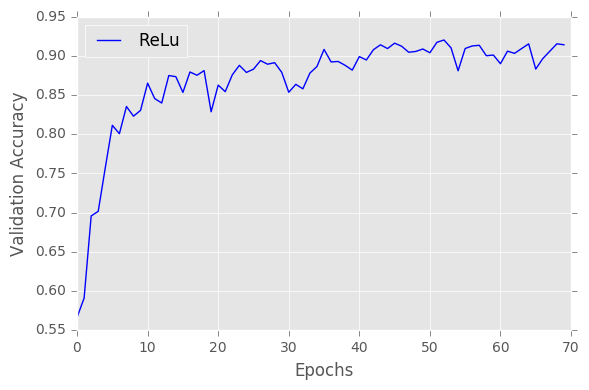

In [165]:
# First use normal split test our model performance
# This part is TEST
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.1, random_state=42)
vals = {'n_hidden':30, 
         'C':0.0, 'epochs':70, 'eta':0.001, 
         'alpha':0.0, 'decrease_const':1e-5, 'minibatches':15,
        'shuffle':True,'random_state':1}
nn_long_relu = TLPReLu(**vals) # same as previous parameter values
%time nn_long_relu.fit(X_train, y_train, print_progress=True, XY_test=(X_test,y_test))
print_result(nn_long_relu, X_train, y_train, X_test, y_test, title="ReLu",color="blue")

(0.85059743954480793, 0.93142857142857138)

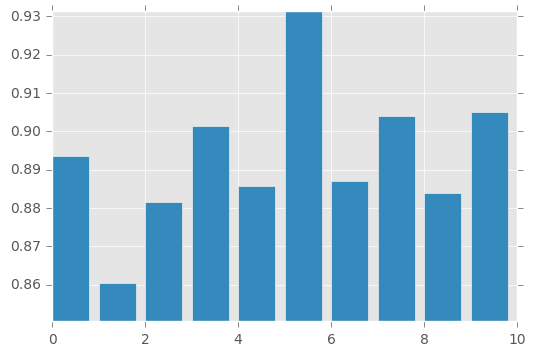

In [166]:
# stratified Kfold
vals = {'n_hidden':30, 
         'C':0.0, 'epochs':70, 'eta':0.001, 
         'alpha':0.0, 'decrease_const':1e-5, 'minibatches':15,
        'shuffle':False,'random_state':1}
clfr = TLPReLu(**vals) # same as previous parameter values
per_fold_eval_criteria = cross_val_score(estimator=clfr,
                                    X=X,
                                    y=y,
                                    cv=cv
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

We use Stratified 10-fold cross validation in our model. From outcomes above, our model has relatively good performance.

In [168]:
# Compare the performance of your MLP training procedure to scikit-learn.
from sklearn import __version__ as sklearn_version
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

print(sklearn_version)
# these values have been hand tuned
clf = MLPClassifier(hidden_layer_sizes=(50, ), 
                    activation='relu', 
                    solver='sgd', 
                    alpha=1e-4, # L2 penalty
                    batch_size='auto', # min of 200, num_samples
                    learning_rate='constant', 
                    learning_rate_init=0.1, # only SGD
                    power_t=0.5,    # only SGD
                    max_iter=75, 
                    shuffle=True, 
                    random_state=1, 
                    tol=1e-9, # for stopping
                    verbose=False, 
                    warm_start=False, 
                    momentum=0.9, # only SGD
                    nesterovs_momentum=True, # only SGD
                    early_stopping=False, 
                    validation_fraction=0.1, # only if early_stop is true
                    beta_1=0.9, # adam decay rate of moment
                    beta_2=0.999, # adam decay rate of moment
                    epsilon=1e-08) # adam numerical stabilizer
# run model training and cross validation

0.18.1


In [176]:
from time import time
def skl():
    my_scorer = make_scorer(f1_score, average = 'macro')
    t0 = time()
    per_fold_eval_criteria = cross_val_score(estimator=clf,
                                        X=X,
                                        y=y,
                                        cv=cv,
                                        scoring=my_scorer
                                       )
    plt.subplot(1,2,1)
    plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
    plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])
    plt.title('Sklearn')
    print("Sklearn done in %0.3fs" % (time() - t0))
def MLP():
    vals = {'n_hidden':30, 
         'C':0.0, 'epochs':70, 'eta':0.001, 
         'alpha':0.0, 'decrease_const':1e-5, 'minibatches':15,
        'shuffle':False,'random_state':1}
    clfr = TLPReLu(**vals) # same as previous parameter values
    t0 = time()
    per_fold_eval_criteria = cross_val_score(estimator=clfr,
                                        X=X,
                                        y=y,
                                        cv=cv
                                       )
    plt.subplot(1,2,2)
    plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
    plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])
    plt.title('Relu MLP')
    print("Our MLP done in %0.3fs" % (time() - t0))

Sklearn done in 32.390s
Our MLP done in 25.467s


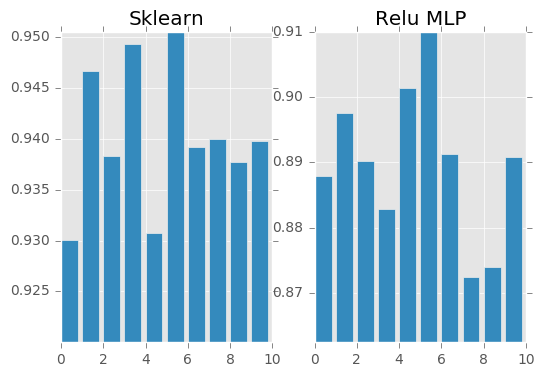

In [177]:
from memory_profiler import memory_usage
skm = memory_usage(skl)
nmm = memory_usage(MLP)

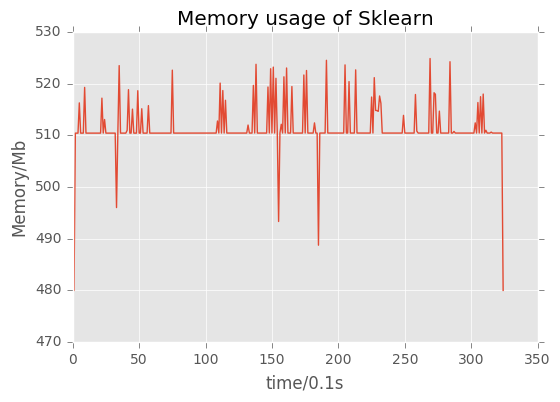

In [178]:
plt.plot(skm)
plt.title('Memory usage of Sklearn')
plt.xlabel('time/0.1s')
plt.ylabel('Memory/Mb')

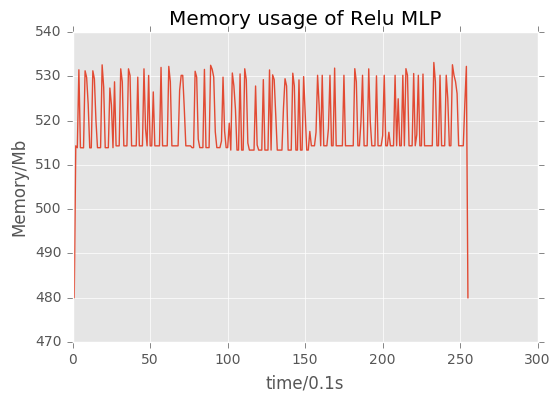

In [179]:
plt.plot(nmm)
plt.title('Memory usage of Relu MLP')
plt.xlabel('time/0.1s')
plt.ylabel('Memory/Mb')

Well, from our simulation outcomes. Our MLP has better time cost than sklearn (7 seconds faster!). But obviously, sklearn has better F1 score and memory usage. It seems we lose. But still our model's performance is accaptable. 

In [85]:
#Tune the hyper-parameters of your MLP model
# Here we choose hyper parameter 'C' and 'eta'
hy_relu = TLPReLu(**vals)
parameters = {'C':[0, 0.001, 0.01, 0.1 ,1],'eta':[0.0001, 0.001, 0.01, 0.1 ,1]}

In [96]:
parameters1 = {'C':[0, 0.001, 0.01, 0.1 ,1]}
clf2 = GridSearchCV(hy_relu, parameters1)
clf2.fit(X,y)
sorted(clf2.cv_results_.keys())
clf2.cv_results_

{'mean_fit_time': array([ 4.27102304,  4.28873706,  4.27954586,  4.31146447,  4.27035499]),
 'mean_score_time': array([ 0.00768709,  0.00752036,  0.00768709,  0.00718562,  0.0075202 ]),
 'mean_test_score': array([ 0.89685714,  0.89042857,  0.89542857,  0.88742857,  0.889     ]),
 'mean_train_score': array([ 0.9344269 ,  0.92328759,  0.92986051,  0.9245677 ,  0.91964715]),
 'param_C': masked_array(data = [0 0.001 0.01 0.1 1],
              mask = [False False False False False],
        fill_value = ?),
 'params': ({'C': 0}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}),
 'rank_test_score': array([1, 3, 2, 5, 4]),
 'split0_test_score': array([ 0.88622754,  0.88195038,  0.89820359,  0.87339607,  0.89221557]),
 'split0_train_score': array([ 0.93093093,  0.93286143,  0.93607894,  0.92320892,  0.93350493]),
 'split1_test_score': array([ 0.89588689,  0.88560411,  0.8898886 ,  0.88346187,  0.87874893]),
 'split1_train_score': array([ 0.93634805,  0.91170167,  0.92734676,  0.91813116,  0.90

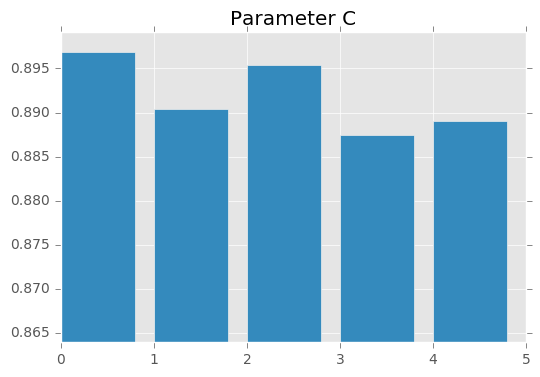

In [101]:
plt.bar(range(5),clf2.cv_results_['mean_test_score'])
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])
plt.title('Parameter C')

From plot above we can find that when C equals to 0 we have the best F1 score. But we can see the differences between them are relatively small. 

In [87]:
parameters2 = {'eta':[0.0001, 0.001, 0.01, 0.1 ,1]}
clf3 = GridSearchCV(hy_relu, parameters1)
clf3.fit(X,y)
sorted(clf3.cv_results_.keys())
clf3.cv_results_

{'mean_fit_time': array([ 4.47056015,  4.30494897,  4.32884367,  4.31781427,  4.3290108 ]),
 'mean_score_time': array([ 0.0075198 ,  0.00735203,  0.00768781,  0.00768812,  0.00768757]),
 'mean_test_score': array([ 0.89142857,  0.89557143,  0.878     ,  0.883     ,  0.88457143]),
 'mean_train_score': array([ 0.93035384,  0.93264589,  0.91399588,  0.91842846,  0.91535898]),
 'param_C': masked_array(data = [0 0.001 0.01 0.1 1],
              mask = [False False False False False],
        fill_value = ?),
 'params': ({'C': 0}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}),
 'rank_test_score': array([2, 1, 5, 4, 3]),
 'split0_test_score': array([ 0.8716852 ,  0.893071  ,  0.86313088,  0.87082977,  0.87810094]),
 'split0_train_score': array([ 0.92342342,  0.93865294,  0.91076791,  0.91870442,  0.92320892]),
 'split1_test_score': array([ 0.89588689,  0.88860326,  0.87789203,  0.88046272,  0.87532134]),
 'split1_train_score': array([ 0.93420489,  0.92970424,  0.90977282,  0.91770253,  0.90

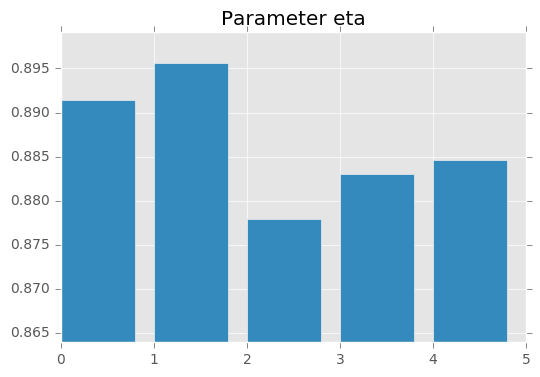

In [104]:
plt.bar(range(5),clf3.cv_results_['mean_test_score'])
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])
plt.title('Parameter eta')

From plot above we can find that when eta equals to 0.001 we have the best F1 score. But same with 'C',  we can see the differences between them are relatively small. 

In [88]:
clf1 = GridSearchCV(hy_relu, parameters)
clf1.fit(X,y)
sorted(clf1.cv_results_.keys())
clf1.cv_results_

{'mean_fit_time': array([ 4.40605116,  4.33070874,  4.28021351,  4.32967957,  4.22774084,
         4.42008615,  4.40454388,  4.64384913,  4.90036321,  4.37630677,
         4.36661045,  4.36427053,  4.28992565,  4.33836897,  4.35625116,
         4.37012339,  4.63599308,  4.3472325 ,  4.40157072,  4.62713663,
         4.33653148,  4.43480285,  4.72295094,  4.44314774,  4.47958048]),
 'mean_score_time': array([ 0.00752012,  0.00751964,  0.00701896,  0.00885709,  0.00685167,
         0.0073541 ,  0.00768725,  0.0083557 ,  0.00785438,  0.00785406,
         0.0073541 ,  0.00718594,  0.0070188 ,  0.00735259,  0.00718617,
         0.00785454,  0.00835594,  0.0075206 ,  0.00785486,  0.00802151,
         0.00735315,  0.00768661,  0.00752028,  0.00768757,  0.00752044]),
 'mean_test_score': array([ 0.819     ,  0.89071429,  0.889     ,  0.09585714,  0.09585714,
         0.81742857,  0.89171429,  0.89628571,  0.09585714,  0.09585714,
         0.81957143,  0.89242857,  0.88657143,  0.09585714,  0.09

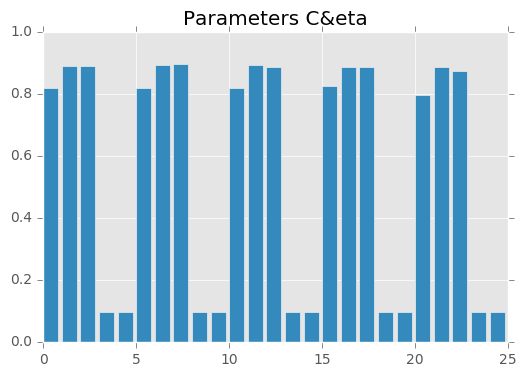

In [112]:
plt.bar(range(25),clf1.cv_results_['mean_test_score'])
plt.ylim([0,1])
plt.title('Parameters C&eta')

From plot above we can find the best combination of hyper parameters 'C' and 'eta' is 'C' equals to 0.001 and 'eta' equals to 0.01.  Notice that unlike one parameter situations, for some combinations, F1 scores can be really low. And the optimal solution  is not a combination of two individual optimal parameters. So we assume that one hyper parameter's influence is very low but when two or more parameters combined together, they can affect MLP's performance greatly.

In [67]:
# Add a different nonlinear activation
# we use tanh as our nonlinear function
class TLPtanh(TLPReLu):    
    @staticmethod
    def _tanh(Z):
        """Compute softmax values for each sets of scores in Z"""
        return np.tanh(Z)
        
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        # A1->W1->ReLu->A2->W2->Sigmoid
        A1 = self._add_bias_unit(X, how='column')
        Z1 = W1 @ A1.T
        A2 = self._relu(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._tanh(Z2)
        return A1, Z1, A2, Z2, A3

Epoch: 2/70

Wall time: 6.38 s
Tanh :
Resubstitution F1 score: 0.923016707039
Validation F1 score: 0.898460781219


Epoch: 70/70

Wall time: 6.19 s
ReLu :
Resubstitution F1 score: 0.920189133423
Validation F1 score: 0.908502420308


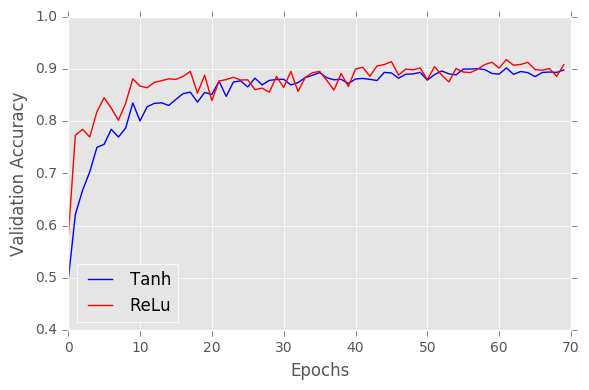

In [72]:
# First use normal split test our model performance
vals = {'n_hidden':30, 
         'C':0.1, 'epochs':70, 'eta':0.001, 
         'alpha':0.0, 'decrease_const':1e-5, 'minibatches':15,
        'shuffle':True,'random_state':1}
nn_long_tanh = TLPtanh(**vals) # same as previous parameter values
%time nn_long_tanh.fit(X_train, y_train, print_progress=True, XY_test=(X_test,y_test))
print_result(nn_long_tanh, X_train, y_train, X_test, y_test, title="Tanh",color="blue")
nn_long_relu = TLPReLu(**vals) # same as previous parameter values
%time nn_long_relu.fit(X_train, y_train, print_progress=True, XY_test=(X_test,y_test))
print_result(nn_long_relu, X_train, y_train, X_test, y_test, title="ReLu",color="red")

(0.84550786838340486, 0.90257879656160456)

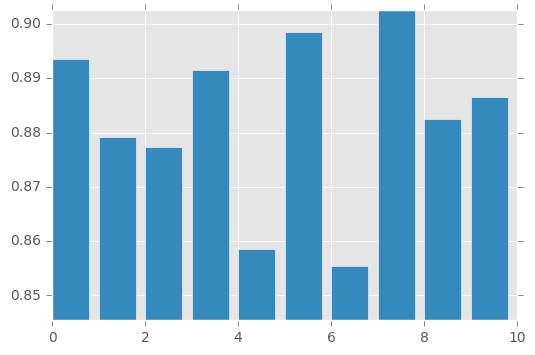

In [198]:
vals = {'n_hidden':30, 
         'C':0.0, 'epochs':70, 'eta':0.001, 
         'alpha':0.0, 'decrease_const':1e-5, 'minibatches':15,
        'shuffle':False,'random_state':1}
clf = TLPtanh(**vals) # same as previous parameter values
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

In [185]:
# How about sklearn(tanh), does it better than our MLP?
clfsk = MLPClassifier(hidden_layer_sizes=(50, ), 
                    activation='tanh', 
                    solver='sgd', 
                    alpha=1e-4, # L2 penalty
                    batch_size='auto', # min of 200, num_samples
                    learning_rate='constant', 
                    learning_rate_init=0.1, # only SGD
                    power_t=0.5,    # only SGD
                    max_iter=75, 
                    shuffle=True, 
                    random_state=1, 
                    tol=1e-9, # for stopping
                    verbose=False, 
                    warm_start=False, 
                    momentum=0.9, # only SGD
                    nesterovs_momentum=True, # only SGD
                    early_stopping=False, 
                    validation_fraction=0.1, # only if early_stop is true
                    beta_1=0.9, # adam decay rate of moment
                    beta_2=0.999, # adam decay rate of moment
                    epsilon=1e-08) # adam numerical stabilizer
# run model training and cross validation

In [190]:
def skl1():
    my_scorer = make_scorer(f1_score, average = 'macro')
    t0 = time()
    per_fold_eval_criteria = cross_val_score(estimator=clfsk,
                                        X=X,
                                        y=y,
                                        cv=cv,
                                        scoring=my_scorer
                                       )
    plt.subplot(1,2,1)
    plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
    plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])
    plt.title('Sklearn')
    print("Sklearn done in %0.3fs" % (time() - t0))
def MLP1():
    vals = {'n_hidden':30, 
         'C':0.0, 'epochs':70, 'eta':0.001, 
         'alpha':0.0, 'decrease_const':1e-5, 'minibatches':15,
        'shuffle':False,'random_state':1}
    clfr = TLPtanh(**vals) # same as previous parameter values
    t0 = time()
    per_fold_eval_criteria = cross_val_score(estimator=clfr,
                                        X=X,
                                        y=y,
                                        cv=cv
                                       )
    plt.subplot(1,2,2)
    plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
    plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])
    plt.title('Tanh MLP')
    print("Our MLP done in %0.3fs" % (time() - t0))

Sklearn done in 33.885s
Our MLP done in 27.469s


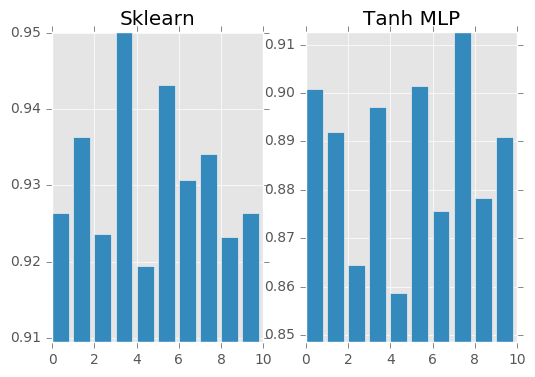

In [191]:
from memory_profiler import memory_usage
skm = memory_usage(skl1)
nmm = memory_usage(MLP1)

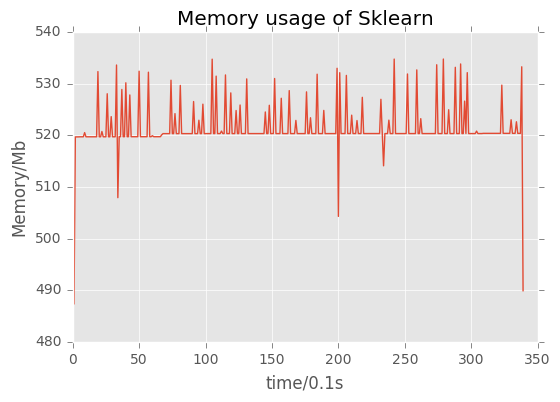

In [194]:
plt.plot(skm)
plt.title('Memory usage of Sklearn')
plt.xlabel('time/0.1s')
plt.ylabel('Memory/Mb')

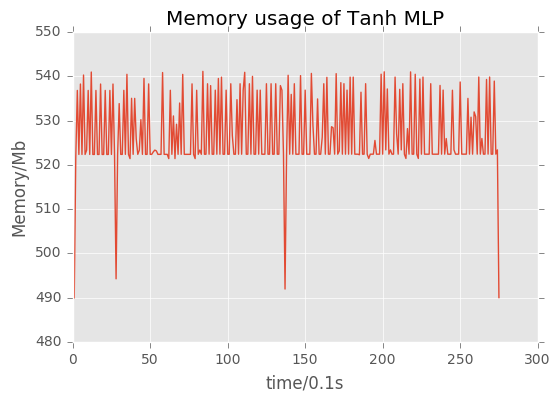

In [197]:
plt.plot(nmm)
plt.title('Memory usage of Tanh MLP')
plt.xlabel('time/0.1s')
plt.ylabel('Memory/Mb')

Well, sklearn still has better accuracy and memory usage. But our model is faster. 
From the outcomes we have, nonlinear functions 'tanh' and 'sigmoid' don't have much difference in F1 score. But relu with sigmoid obviously use shorter time and lower memory while training than tanh does. How about softmax?

In [181]:
# Add a different nonlinear activation
# we use tanh as our nonlinear function
class TLPsoftmax(TLPReLu):    
    @staticmethod
    def _softmax(x):
        """Compute softmax values for each sets of scores in x."""
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum()
        
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        # A1->W1->ReLu->A2->W2->Sigmoid
        A1 = self._add_bias_unit(X, how='column')
        Z1 = W1 @ A1.T
        A2 = self._relu(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._softmax(Z2)
        return A1, Z1, A2, Z2, A3

Epoch: 70/70

Wall time: 4.54 s
Softmax :
Resubstitution F1 score: 0.0177793581183
Validation F1 score: 0.0197923231596


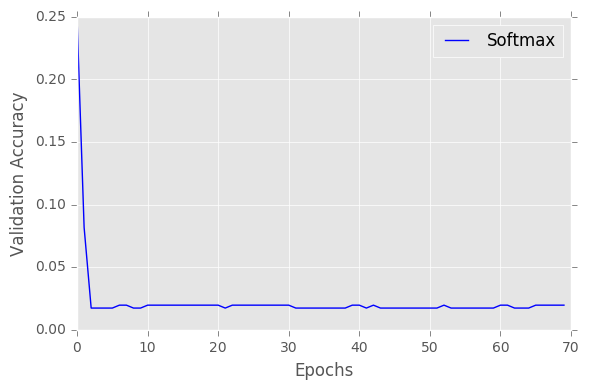

In [196]:
# First use normal split test our model performance
vals = {'n_hidden':30, 
         'C':0.1, 'epochs':70, 'eta':0.001, 
         'alpha':0.0, 'decrease_const':1e-5, 'minibatches':15,
        'shuffle':True,'random_state':1}
nn_long_softmax = TLPsoftmax(**vals) # same as previous parameter values
%time nn_long_softmax.fit(X_train, y_train, print_progress=True, XY_test=(X_test,y_test))
print_result(nn_long_softmax, X_train, y_train, X_test, y_test, title="Softmax",color="blue")

Well, it seems softmax doesn't compatable with our dataset. But why? We assume that the out put of softmax function is too small. And finally makes the whole MLP collapse that's why after several iterations F1 score goes down to 0.01.